<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">2. Pré-processamento</span>
</div>

In [1]:
%%capture
%run 1.Analise_Exploratoria.ipynb

Podemos excluir a coluna CUST_ID, pois não é relevante par a elaboração do nosso modelo de agrupamento.

In [2]:
# Exclusão da coluna CUST_ID
df.drop(['CUST_ID'], axis=1, inplace=True)

Como foi verificado anteriormente CREDIT_LIMIT possui apenas um valor nulo, então podemos excluir este único valor nulo sem problemas.

In [3]:
# Exclusão do valor nulo na coluna CREDIT_LIMIT
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Na coluna MINIMUM_PAYMENTS constatou-se a presença de 313 valores nulos. Neste caso, é mais pertinente realizar a substituição destes valores pela mediana.

In [4]:
# Substituição dos valores nulos pela mediana
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df.MINIMUM_PAYMENTS = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1,1))[:,0]
df.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [5]:
# Tamanho do Dataset após as mudanças
df.shape

(8949, 17)

Mediante a análise exploratória feita foi possível identificar um excesso de valores discrepantes (outliers) além de que os dados possuem uma distribuição assimétrica e estão dispostos em escalas diferentes. De modo a lidar com estes obstáculos, vamos utilizar a normalização para colocar todas as colunas na mesma escala (0 a 1), e em seguida aplicaremos a transformação logarítmica para termos uma distribuição mais simétrica e suavizar a influência dos outliers.

# 2.1 - NORMALIZAÇÃO

In [6]:
# Colunas para aplicar a Normalização
cols_norm = df.columns

In [7]:
# Cópia do DataFrame
df_norm = df.copy()

In [8]:
# Criação do normalizador
normalizacao = MinMaxScaler()

In [9]:
# Aplica a normalização
df_norm[cols_norm] = normalizacao.fit_transform(df[cols_norm])

In [10]:
# Resumo Estatístico Dados Normalizados
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,0.082163,0.109309,0.0,0.006741,0.045879,0.107880,1.0
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8949.0,0.020459,0.043572,0.0,0.000812,0.007371,0.022638,1.0
ONEOFF_PURCHASES,8949.0,0.014536,0.040724,0.0,0.000000,0.000932,0.014176,1.0
INSTALLMENTS_PURCHASES,8949.0,0.018272,0.040195,0.0,0.000000,0.003956,0.020829,1.0
CASH_ADVANCE,8949.0,0.020768,0.044493,0.0,0.000000,0.000000,0.023630,1.0
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8949.0,0.090094,0.133422,0.0,0.000000,0.000000,0.148148,1.0


# 2.2 - TRANSFORMAÇÃO LOGARÍTMICA

In [11]:
# Aplicar a transformação logarítmica em todas as colunas
df_norm = df_norm.apply(lambda x: np.log(x + 1))

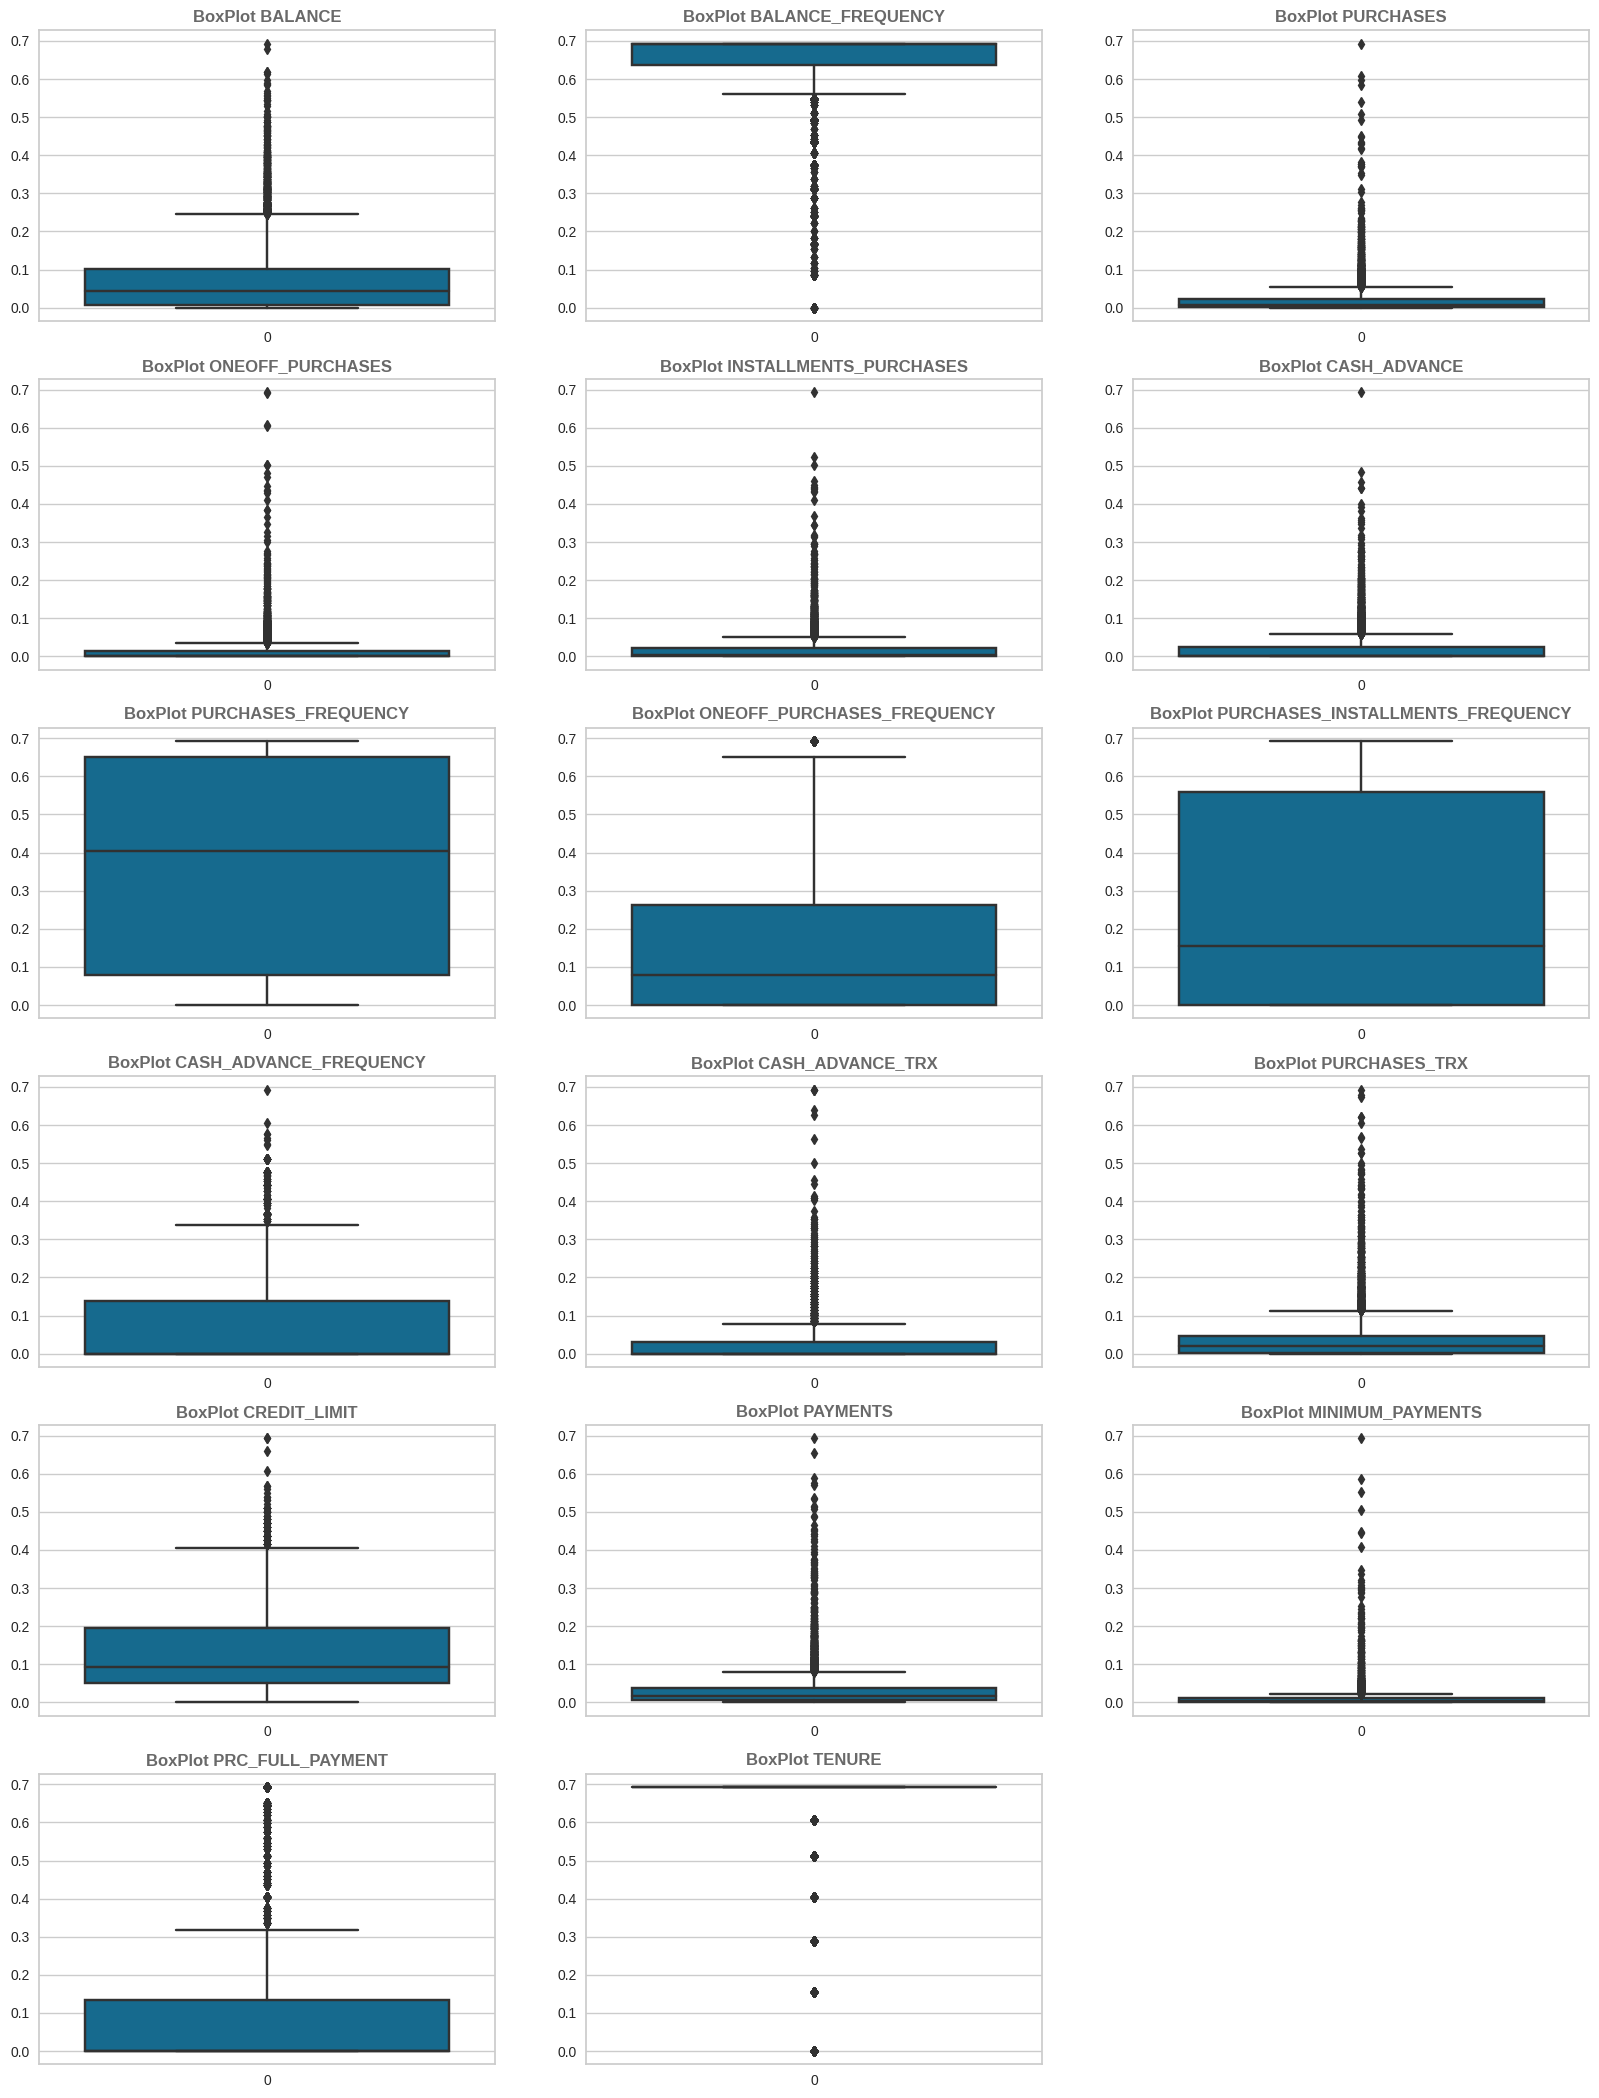

In [12]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df_norm[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

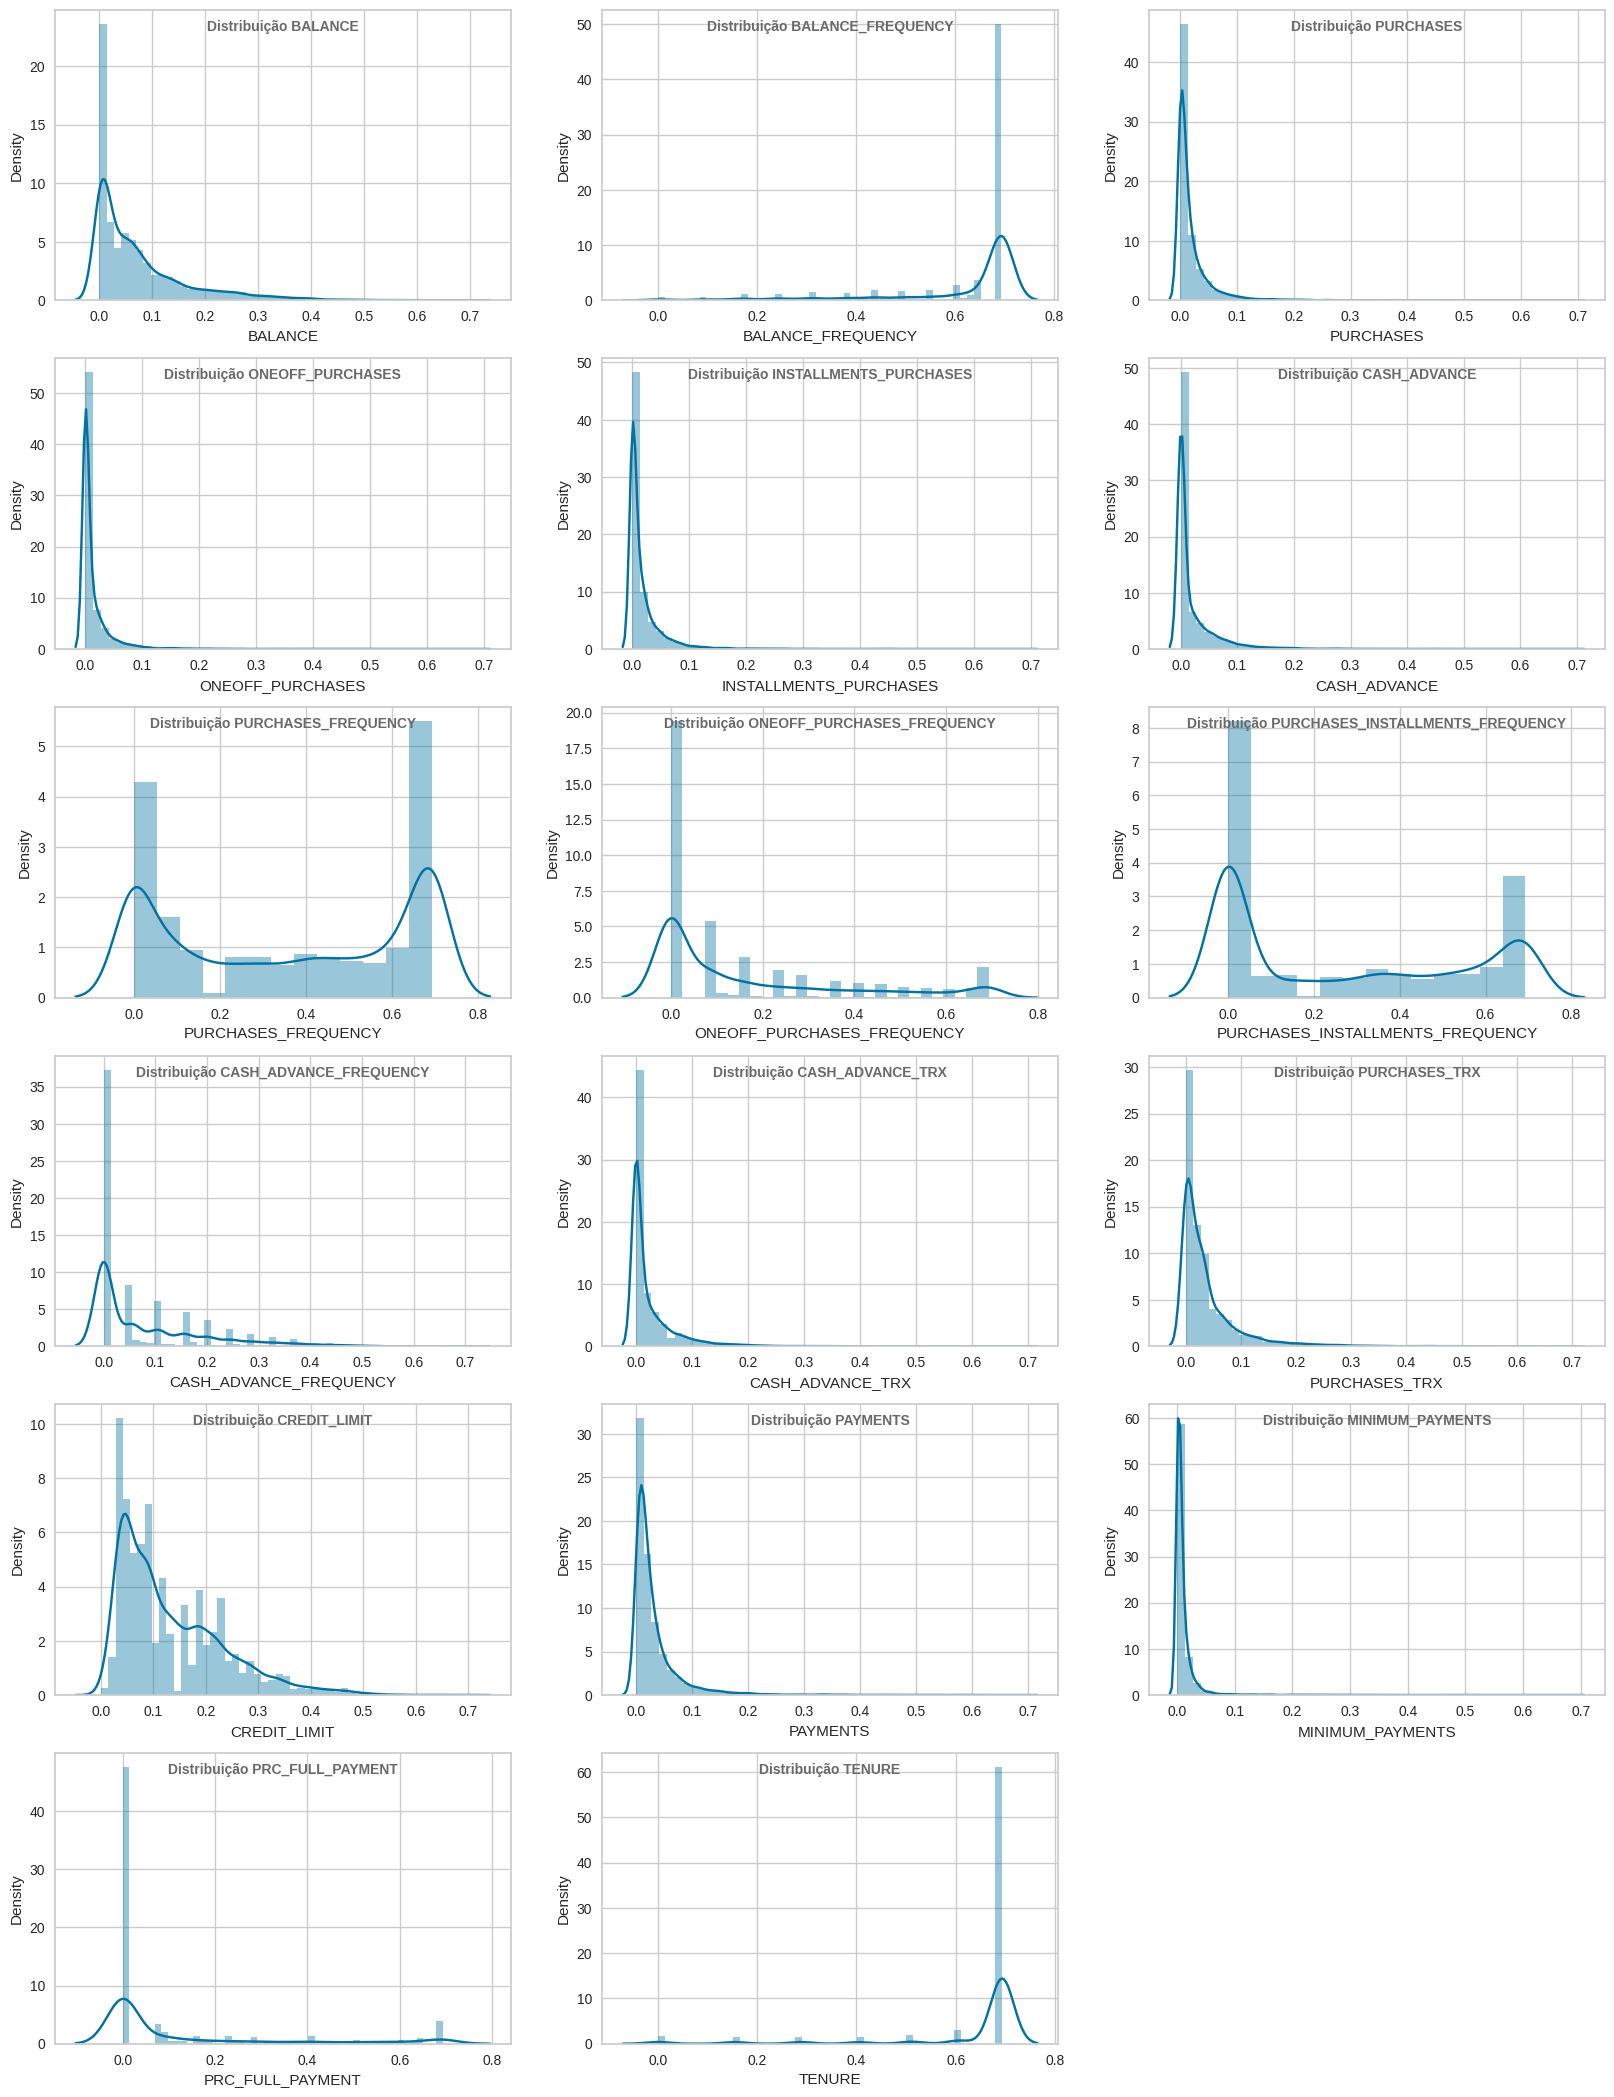

In [13]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df_norm[column])
    plt.title('Distribuição {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

# 2.3 - ANÁLISE DE COMPONENTES PRINCIPAIS (PCA)

A análise de componentes principais (PCA) é um método usado em aprendizado de máquina não supervisionado que reduz dados de alta dimensão para dimensões menores, preservando o máximo de informações possível. Ao usar o PCA antes de aplicar o algoritmo de agrupamento, ele permite reduzir dimensões, ruído de dados e diminuir o custo de computação. Neste notebook, vamos tentar encontrar o número ideal para este conjunto de dados.

In [14]:
# Instanciar o PCA
pca = PCA()

# Aplicar o PCA
df_pca = pca.fit_transform(df_norm)

Quantidade de variação explicada por cada um dos componentes:

In [15]:
# Tabela quantidade de variação explicada
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Nº de Componentes'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Variância Explicada'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

,Nº de Componentes,Variância Explicada
1,1,0.163329
2,2,0.049088
3,3,0.043174
4,4,0.022623
5,5,0.021074
6,6,0.014645
7,7,0.007914
8,8,0.005146
9,9,0.002900
10,10,0.002310


Porcentagem da variância explicada por cada um dos componentes selecionados:

In [16]:
# Tabela Porcentagem da variância explicada
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Nº de Componentes'])
pev = (pca.explained_variance_ratio_) * 100
df_pev = pd.DataFrame(pev, columns=['Porcentagem da Variância Explicada'])
df_pev = pd.concat([df_com, df_pev], axis=1)
df_pev.index = df_ev.index + 1
df_pev
df_pev.style.set_properties(**{'text-align': 'center'})

,Nº de Componentes,Porcentagem da Variância Explicada
2,1,48.575316
3,2,14.599091
4,3,12.840135
5,4,6.728361
6,5,6.267456
7,6,4.355470
8,7,2.353552
9,8,1.530411
10,9,0.862544
11,10,0.687141


Porcentagem cumulativa da variância explicada por cada um dos componentes selecionados:

In [17]:
# Tabela Porcentagem cumulativa da variância explicada
num_com = range(1, 18)
com = pd.DataFrame(num_com, columns=['Nº de Componentes'])
cpev = (pca.explained_variance_ratio_.cumsum()) * 100
df_cpev = pd.DataFrame(cpev, columns=['Porcentagem Cumulativa da Variância Explicada'])
df_cpev = pd.concat([df_com, df_cpev], axis=1)
df_cpev.index = df_cpev.index + 1
df_cpev
df_cpev.style.set_properties(**{'text-align': 'center'})

,Nº de Componentes,Porcentagem Cumulativa da Variância Explicada
1,1,48.575316
2,2,63.174407
3,3,76.014542
4,4,82.742903
5,5,89.010360
6,6,93.365830
7,7,95.719382
8,8,97.249793
9,9,98.112337
10,10,98.799478


Isto nos diz a quantidade de variância explicada à medida que adicionamos componentes principais. PC1 sozinho explica 48%, PC1 e PC2 explicam 63%, PC1, PC2 e PC3 explicam 76%, assim em diante até 100% explicado por todos os 17 componentes principais.

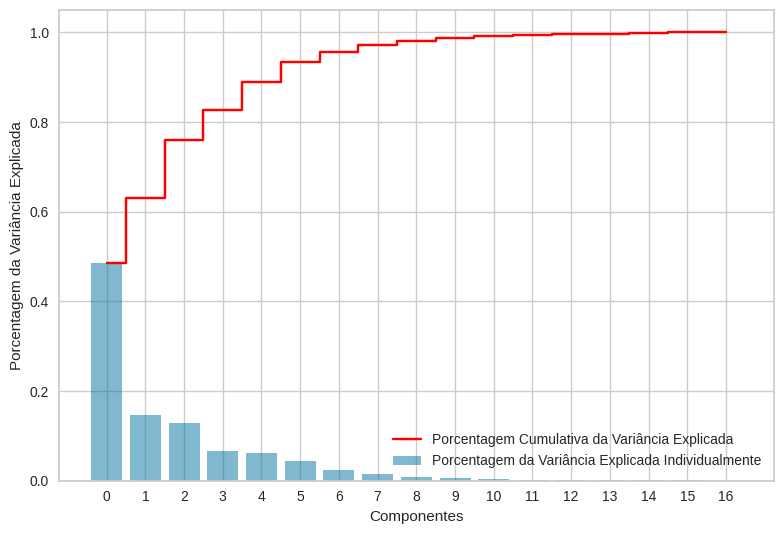

In [18]:
# Plot

# Intanciar a Porcentagem da variância explicada
pve = pca.explained_variance_ratio_

# Intanciar a Porcentagem cumulativa da variância
pcve = np.cumsum(pve)

# Plot
plt.bar(range(0,len(pve)), pve, alpha=0.5, align='center', label='Porcentagem da Variância Explicada Individualmente')
plt.step(range(0,len(pcve)), pcve, where='mid',label='Porcentagem Cumulativa da Variância Explicada', color='red')
plt.xticks(range(0, 17))
plt.ylabel('Porcentagem da Variância Explicada')
plt.xlabel('Componentes')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

No gráfico apresentado, cada barra ilustra a porcentagem de variação explicada pelos componentes individuais e o gráfico de etapas exibe as porcentagens cumulativas de variação explicada após a aplicação do PCA (Análise de Componentes Principais). O número de barras corresponde ao número de variáveis presentes no conjunto de dados original. Com esse gráfico, é possível ter uma visão geral de quantos componentes devem ser preservados.

Agora vamos plotar um gráfico Scree plot para selecionar os componentes principais a serem mantidos, o gráfico Scree plot é usado para visualizar a quantidade de variação nos dados que é explicada por cada componente principal gerada pelo PCA.

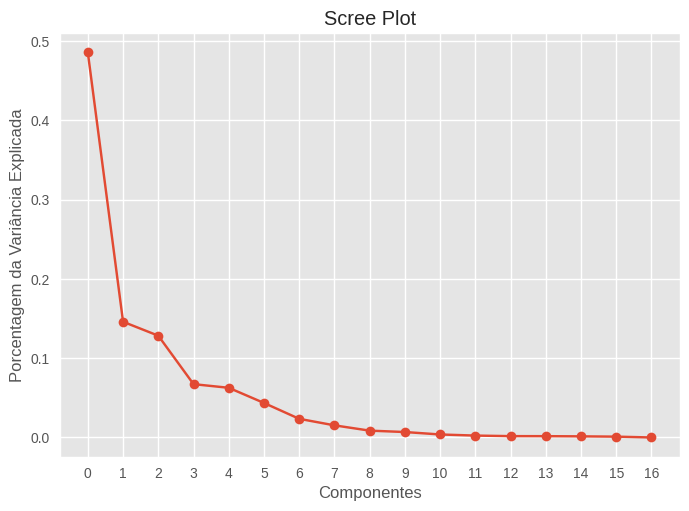

In [19]:
# Plot
plt.style.use('ggplot')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Componentes') 
plt.ylabel('Porcentagem da Variância Explicada') 
plt.title('Scree Plot')
plt.show();

O eixo y mostra a porcentagem da variância explicada e o eixo x o número de componentes principais. A parte inclinada do gráfico representa os componentes principais que explicam a maior parte da variação dos dados. Esses componentes principais geralmente são consideradas os mais importantes e devem ser selecionados. A parte plana do gráfico representa as componentes principais que explicam menos da variação dos dados e podem ser descartadas sem afetar significativamente a qualidade do agrupamento. Assim, Uma curva ideal deve ser íngreme, depois dobra em um "cotovelo" (este é o ponto de corte) e depois achata. Portanto, selecionamos todos os componentes até o ponto onde ocorre a dobra no Scree Plot. No gráfico acima, percebemos visualmente que a dobra ocorre com 4 componentes. Logo, essa deve ser a nossa escolha.

Geralmente é recomendado utilizar pelo menos 80% da variação dos dados ao aplicar PCA, isto é importante porque a variância dos dados representa a quantidade de informação e a diversidade presentes nos dados. Quanto maior for a variância dos dados, mais informação e diversidade eles contêm. Então, ao se utilizar o PCA para reduzir a dimensionalidade dos dados, a ideia é preservar a maior quantidade de informação e diversidade possíveis.

Preservando a variância dos dados originais, garante-se que a maior parte da informação presente nos dados originais esteja presente na representação reduzida dos dados. Isso é fundamental, pois ao se utilizar uma representação reduzida dos dados, é comum que haja perda de informação. Por isso, quanto mais variância dos dados originais for preservada, menos perda de informação haverá.

Além disso, ao preservar a variância dos dados, também é possível preservar a diversidade dos dados para garantir que os resultados obtidos ao utilizar o PCA sejam representativos dos dados originais, e que sejam possíveis de serem interpretados.

Deste modo, vamos verificar graficamente se ao escolher 4 componentes temos pelo menos 80% da variação dos dados.

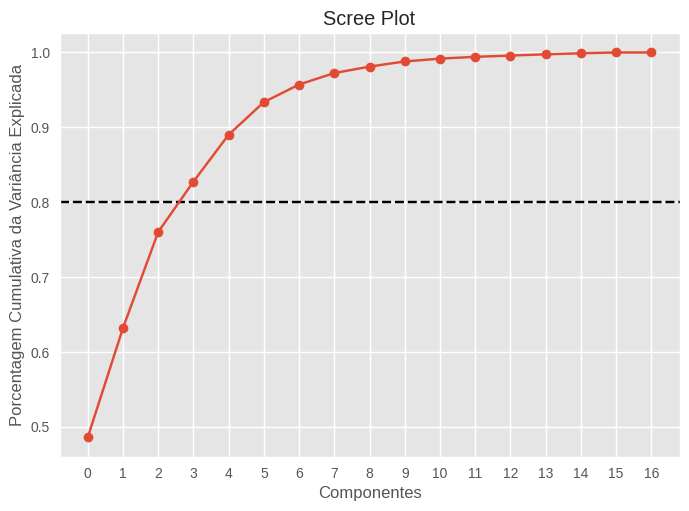

In [20]:
# Plot
plt.style.use('ggplot')
plt.axhline(y=0.8, color='black', linestyle='--')
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Componentes') 
plt.ylabel('Porcentagem Cumulativa da Variância Explicada') 
plt.title('Scree Plot')
plt.show();

Com 4 componentes temos um pouco mais de 80% da variação dos dados originais, o que configura-se como uma escolha adequada.

In [21]:
# Aplica o PCA a 4 componentes
pca1 = PCA(n_components=4, random_state=18)
df_pca1 = pca1.fit_transform(df_norm)
df_pca1.shape

(8949, 4)